In [1]:
import cv2
import math
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import random

# Folders and files  

In [10]:
def read_labels(file):
    return np.loadtxt(file, delimiter=" ", unpack=False)

# Transform YOLOv5's notes 

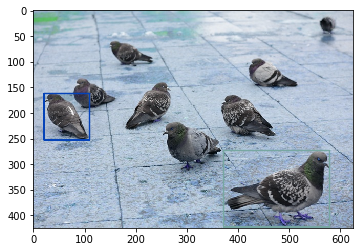

In [46]:
def plot_rectangle(x, img):
    tl = round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1
    color = [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int((x[0] - x[2] / 2) * img.shape[1]), int((x[1] - x[3] / 2) * img.shape[0])), (int((x[0] + x[2] / 2) * img.shape[1]), int((x[1] + x[3] / 2) * img.shape[0]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    
    
def draw_rectangles(image, labels):
    tmp = image.copy()
    for label in labels:
        plot_rectangle(label[1:], tmp)
    return tmp
    
    
labels = read_labels('data/labels/dove.txt')
image = cv2.imread('data/images/dove.jpg')
boxed_image = draw_rectangles(image, labels)

plt.imshow(boxed_image)

# Image level augmentation

### Original image

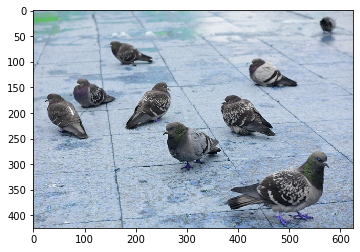

In [2]:
image = cv2.imread("data/images/dove.jpg")
plt.imshow(image)

### Rotated image

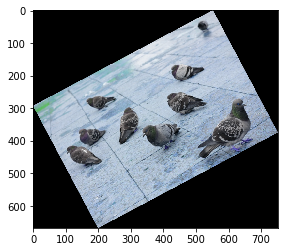

In [3]:
def rotate_image(image, angleInDegrees):
    h, w = image.shape[:2]
    img_c = (w / 2, h / 2)

    rot = cv2.getRotationMatrix2D(img_c, angleInDegrees, 1)

    rad = math.radians(angleInDegrees)
    sin = math.sin(rad)
    cos = math.cos(rad)
    b_w = int((h * abs(sin)) + (w * abs(cos)))
    b_h = int((h * abs(cos)) + (w * abs(sin)))

    rot[0, 2] += ((b_w / 2) - img_c[0])
    rot[1, 2] += ((b_h / 2) - img_c[1])

    outImg = cv2.warpAffine(image, rot, (b_w, b_h), flags=cv2.INTER_LINEAR)
    return outImg

angle = random.randint(5, 50)
plt.imshow(rotate_image(image, angle))

### Grayscale image

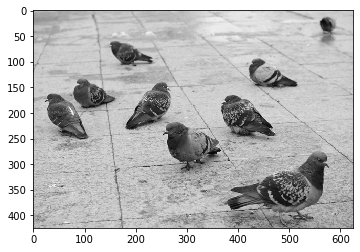

In [4]:
def image_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(image_to_grayscale(image), cmap='gray')

### 90deg rotated image

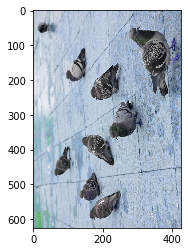

In [5]:
plt.imshow(rotate_image(image, 90))

### 180deg rotated image

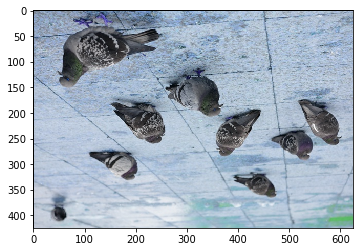

In [6]:
plt.imshow(rotate_image(image, 180))

### 270deg rotated image

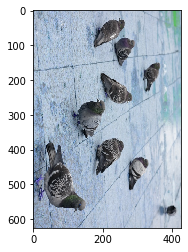

In [7]:
plt.imshow(rotate_image(image, 270))

### Salt-and-pepper noisy image

/home/happy-unicorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/home/happy-unicorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


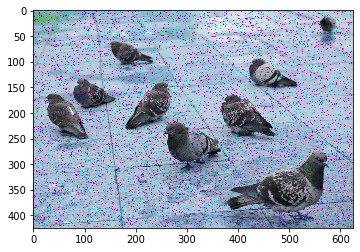

In [8]:
def noisy(image):
    row, col, ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    out = image.copy()
    
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    out[coords] = 1

    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    out[coords] = 0
    
    return out


plt.imshow(noisy(image))

### Blured image

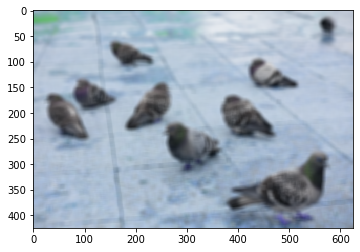

In [9]:
def blur(image):
    ksize = (10, 10)
    return cv2.blur(image, ksize)
    
    
plt.imshow(blur(image))